# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama:
- Email:
- Id Dicoding:

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
import pickle
import joblib
import json
from scipy.stats import pointbiserialr
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (8,5)

### Menyiapkan data yang akan diguankan

In [2]:
DATA_PATH = Path("data.csv")
df = pd.read_csv(DATA_PATH)

## Data Understanding

In [3]:
print("Ukuran data:", df.shape)
df.head()

Ukuran data: (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [4]:
print("\nInfo:")
df.info()


Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-n

In [5]:
print("\nRingkasan numerik:")
display(df.describe().T.round(2))


Ringkasan numerik:


,count,mean,std,min,25%,50%,75%,max
Marital_status,4424.0,1.18,0.61,1.00,1.00,1.00,1.00,6.00
Application_mode,4424.0,18.67,17.48,1.00,1.00,17.00,39.00,57.00
Application_order,4424.0,1.73,1.31,0.00,1.00,1.00,2.00,9.00
Course,4424.0,8856.64,2063.57,33.00,9085.00,9238.00,9556.00,9991.00
Daytime_evening_attendance,4424.0,0.89,0.31,0.00,1.00,1.00,1.00,1.00
Previous_qualification,4424.0,4.58,10.22,1.00,1.00,1.00,1.00,43.00
Previous_qualification_grade,4424.0,132.61,13.19,95.00,125.00,133.10,140.00,190.00
Nacionality,4424.0,1.87,6.91,1.00,1.00,1.00,1.00,109.00
Mothers_qualification,4424.0,19.56,15.60,1.00,2.00,19.00,37.00,44.00
Fathers_qualification,4424.0,22.28,15.34,1.00,3.00,19.00,37.00,44.00


In [6]:
print("\nSebaran label status:")
print(df['Status'].value_counts())


Sebaran label status:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


In [7]:
dupes = df.duplicated().sum()
missing = df.isna().sum().sum()
print(f"Duplikat: {dupes},  Missing values: {missing}")

Duplikat: 0,  Missing values: 0


In [8]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

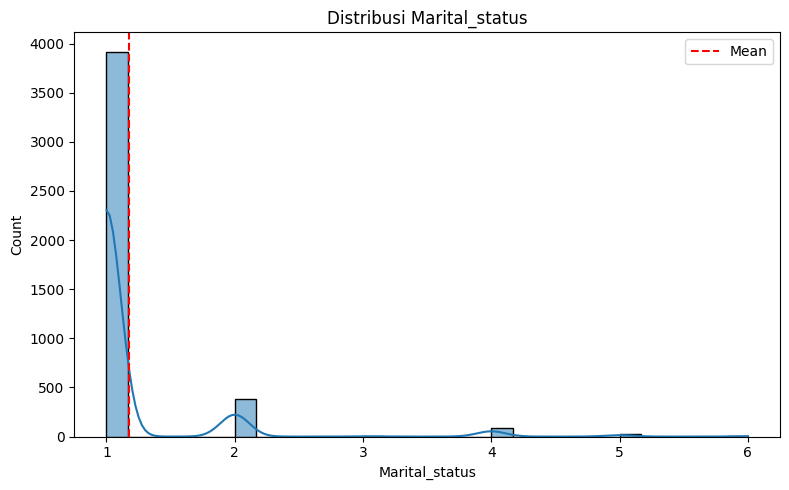

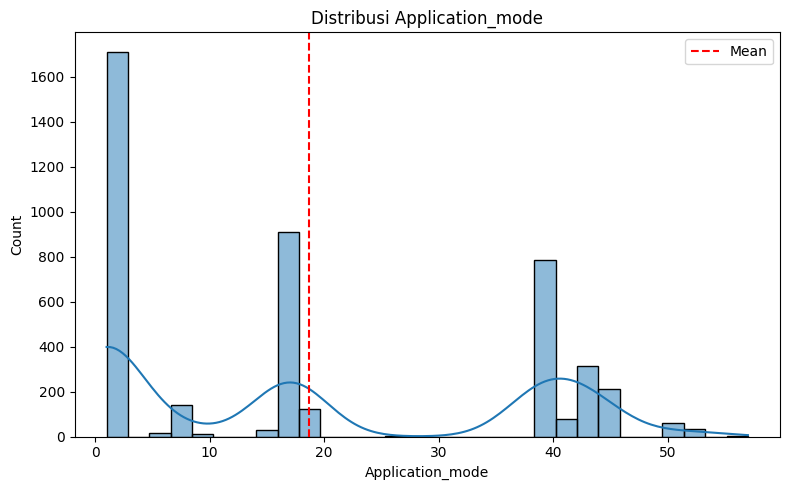

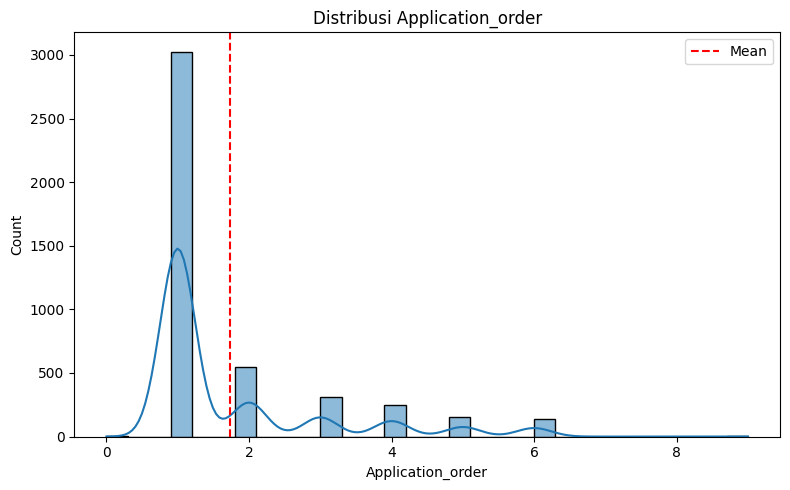

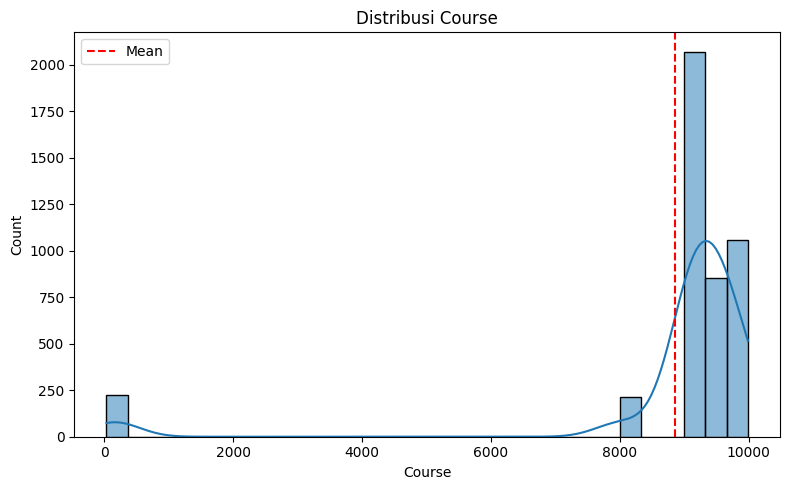

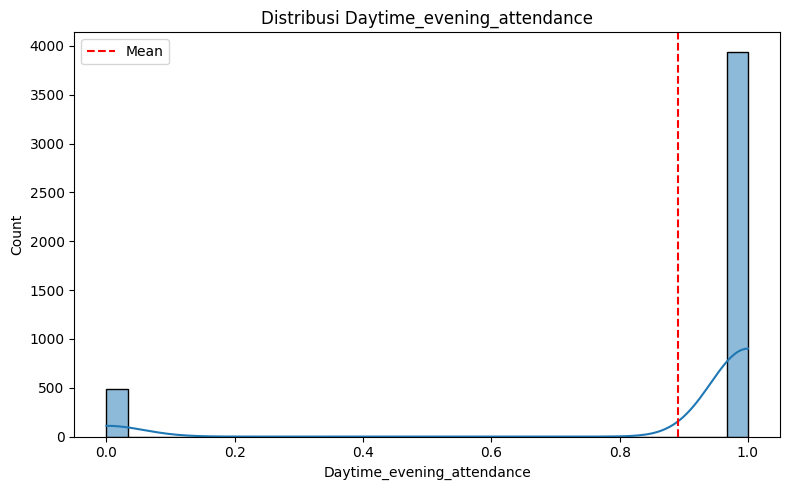

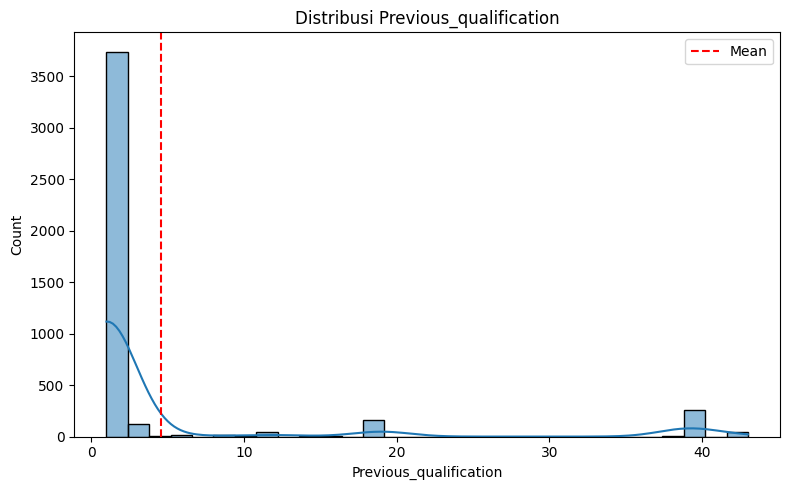

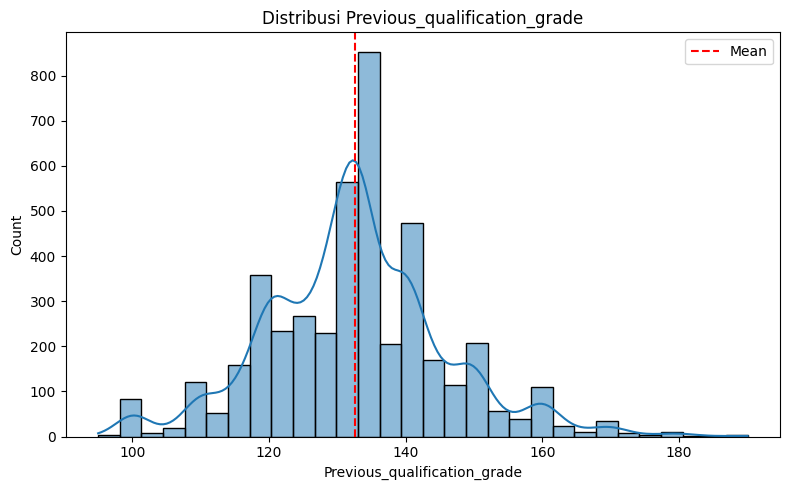

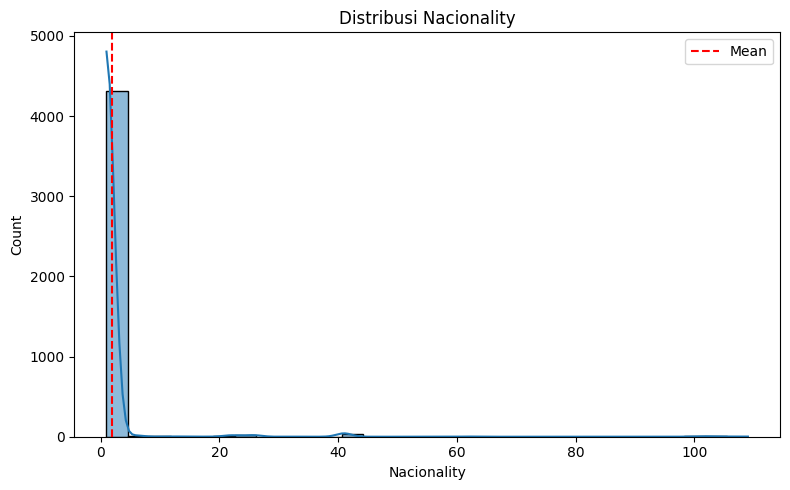

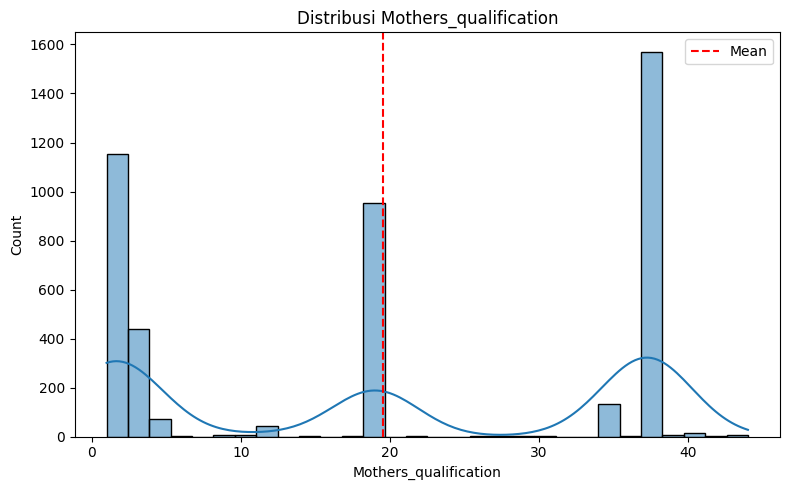

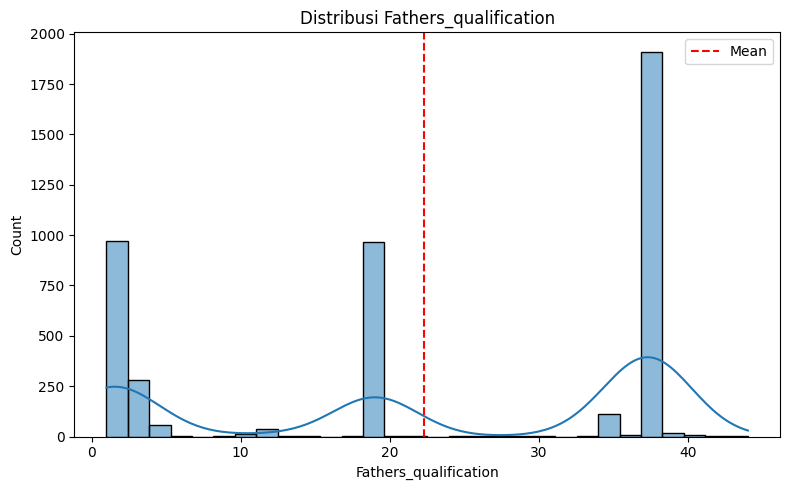

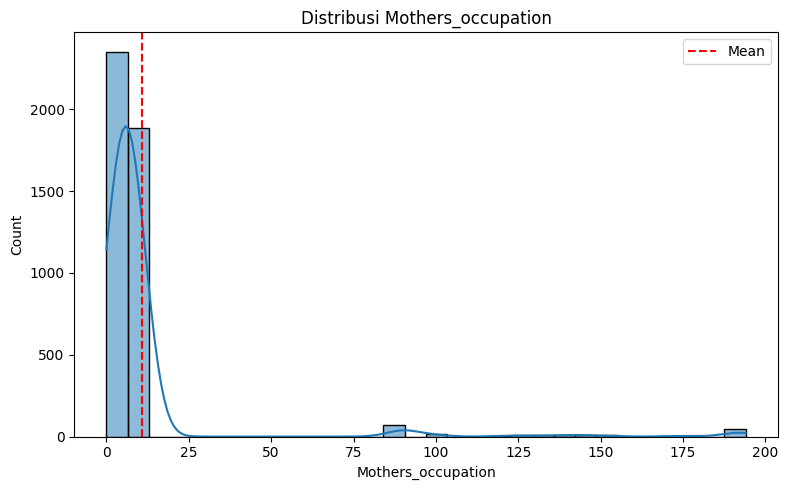

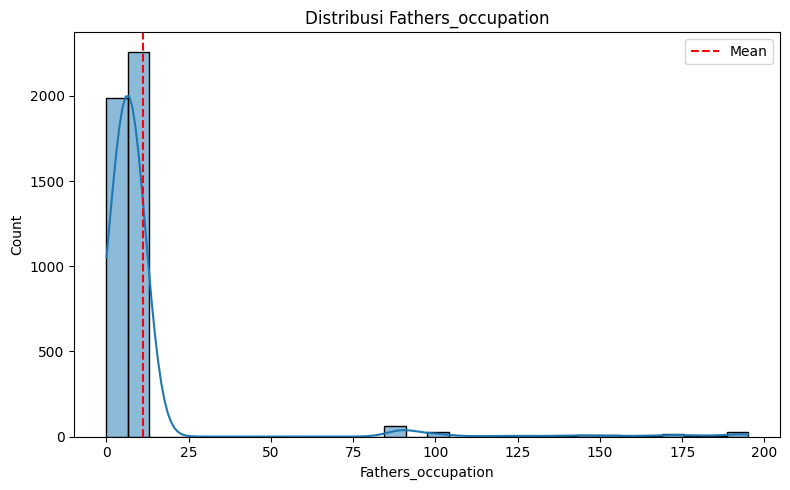

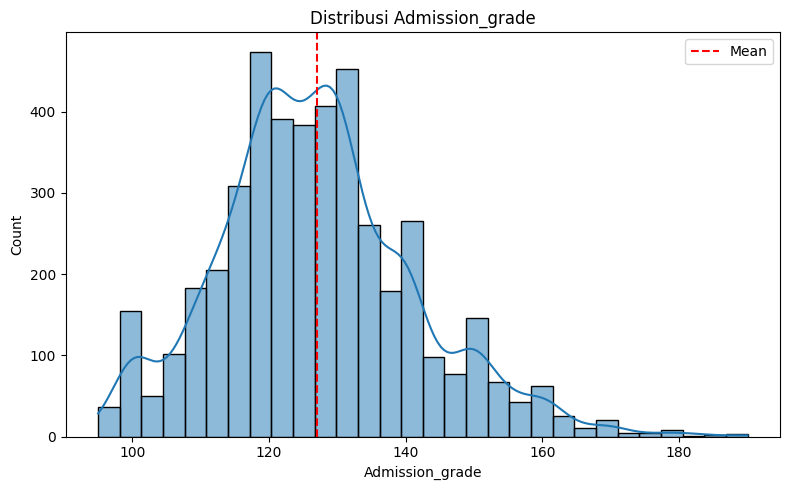

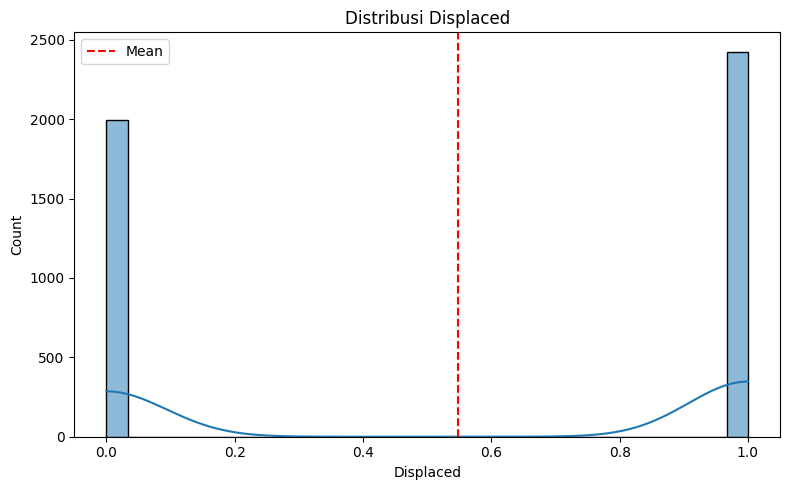

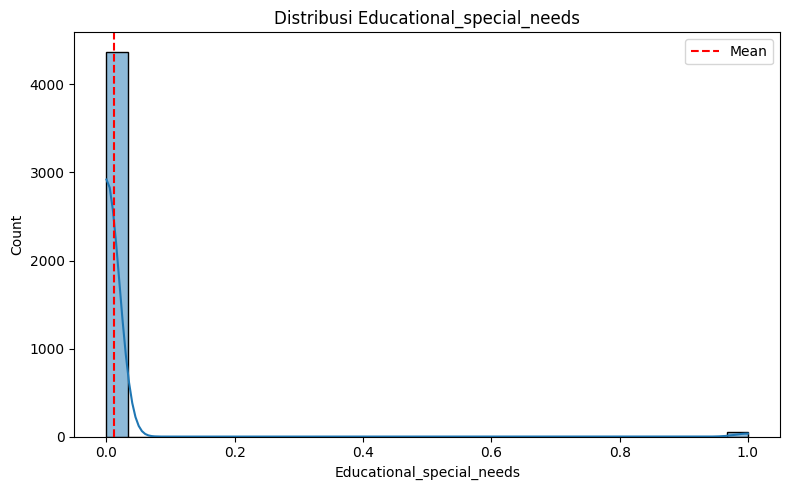

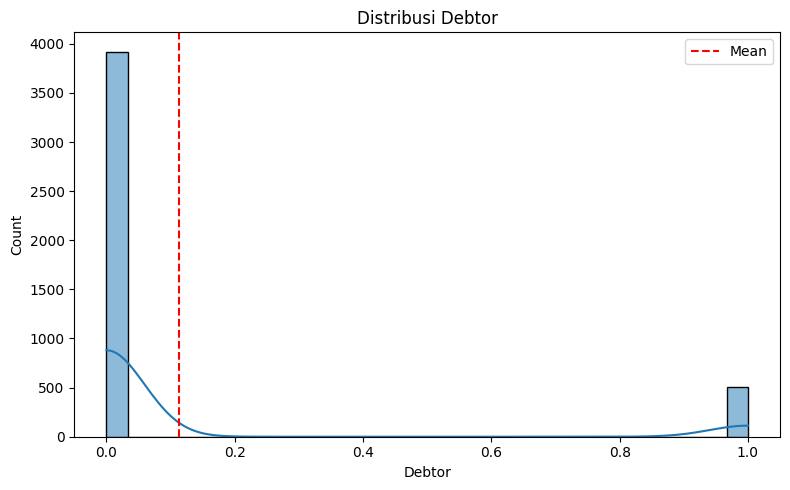

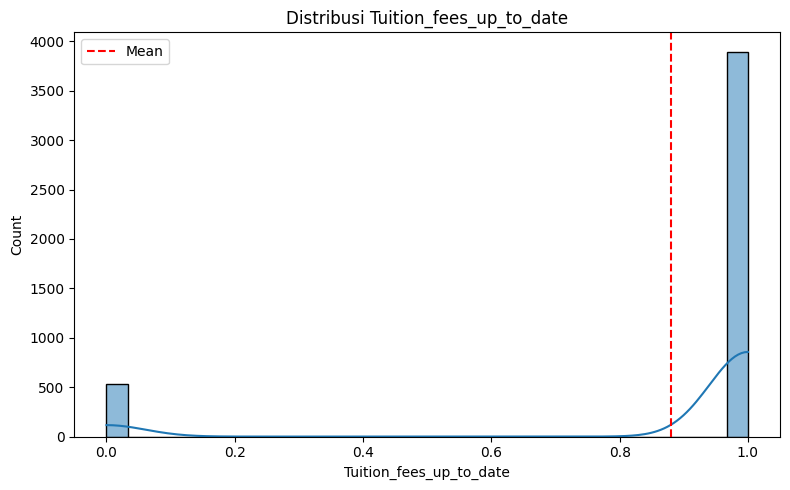

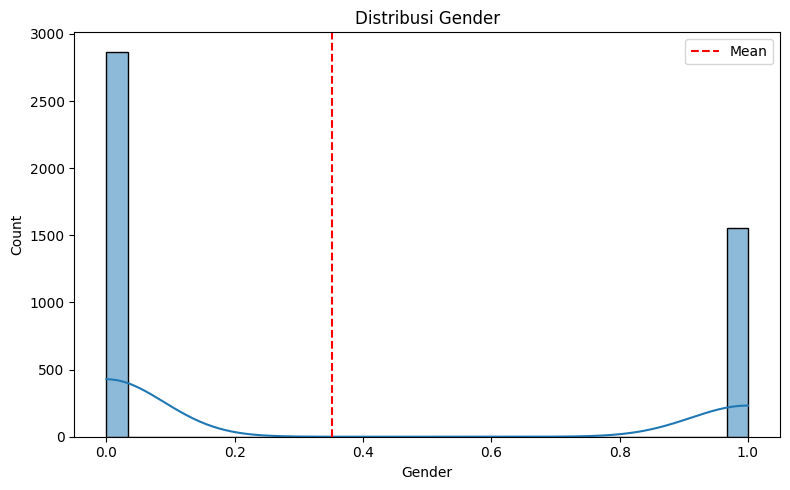

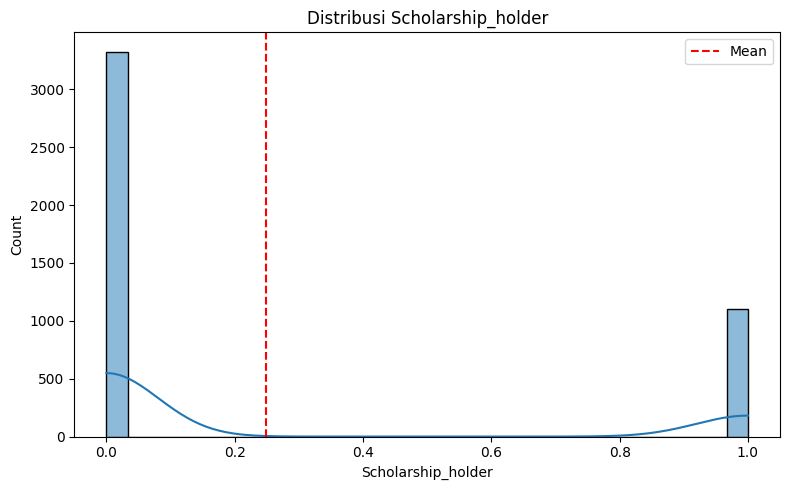

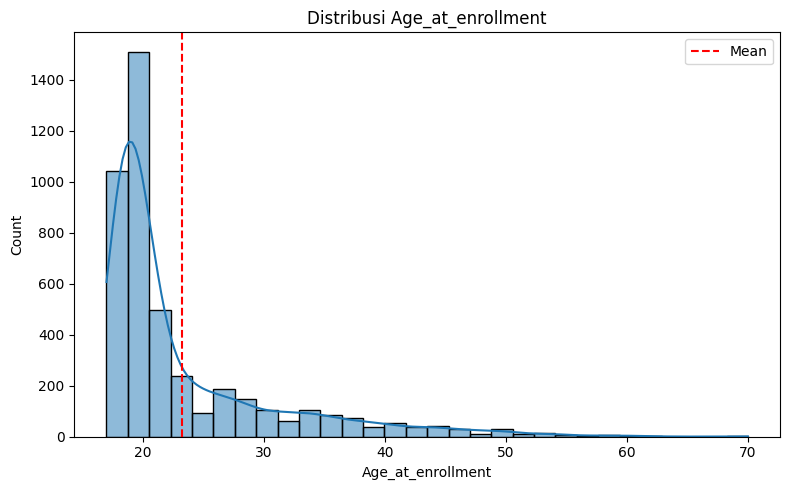

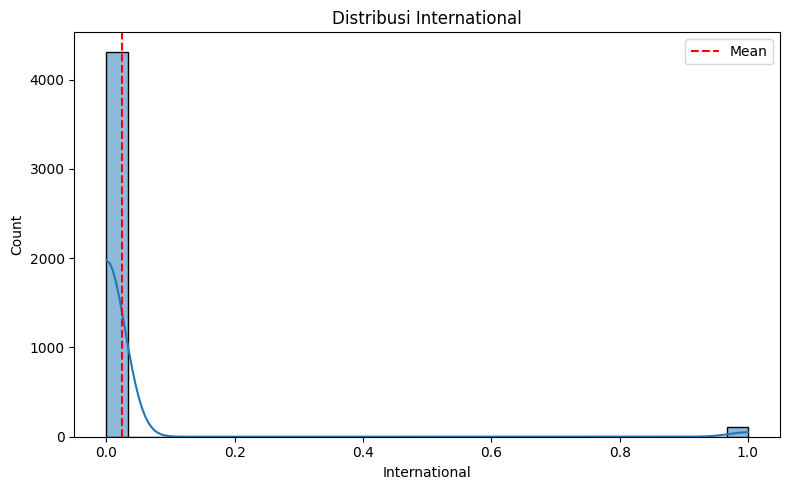

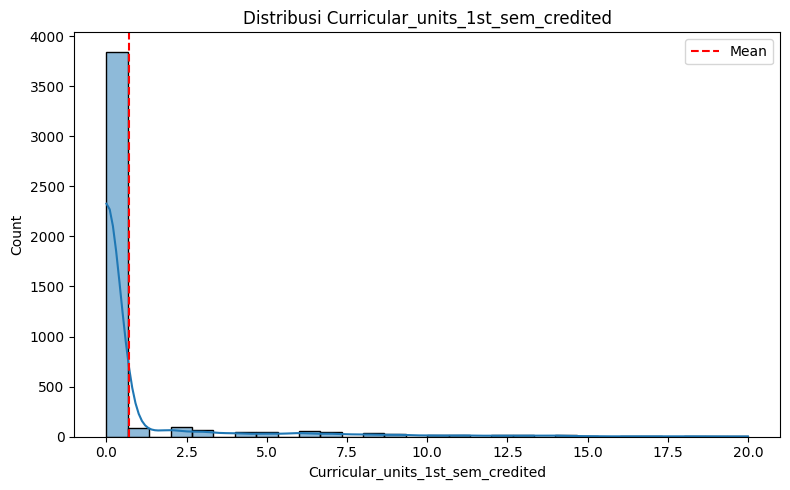

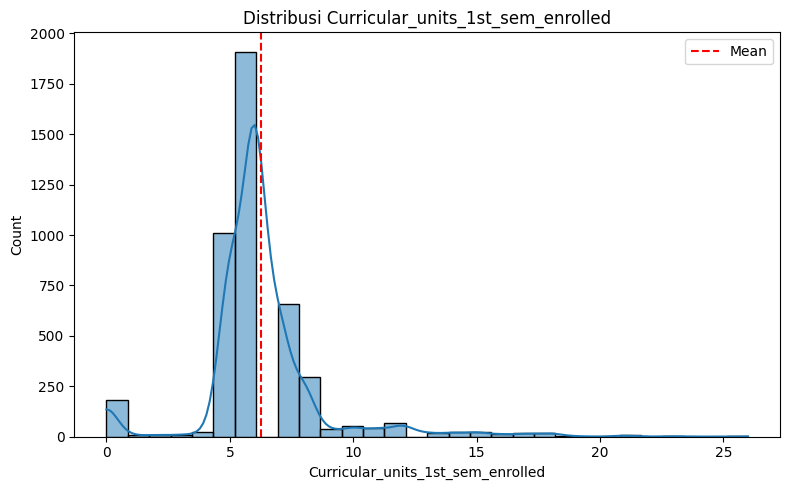

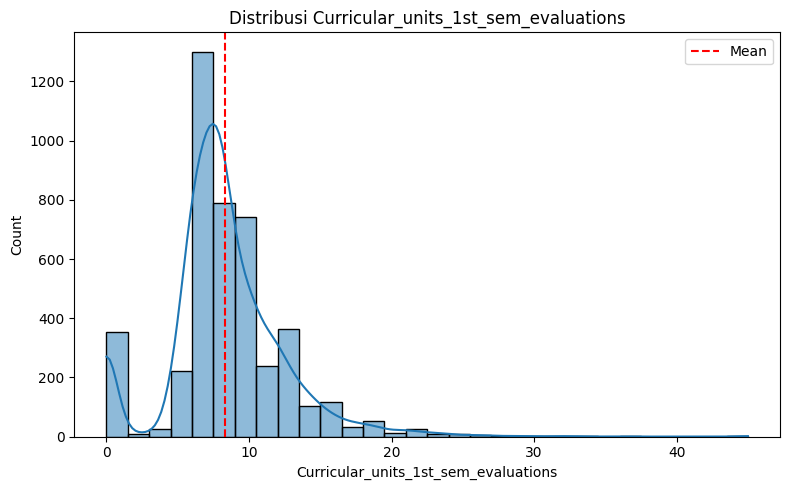

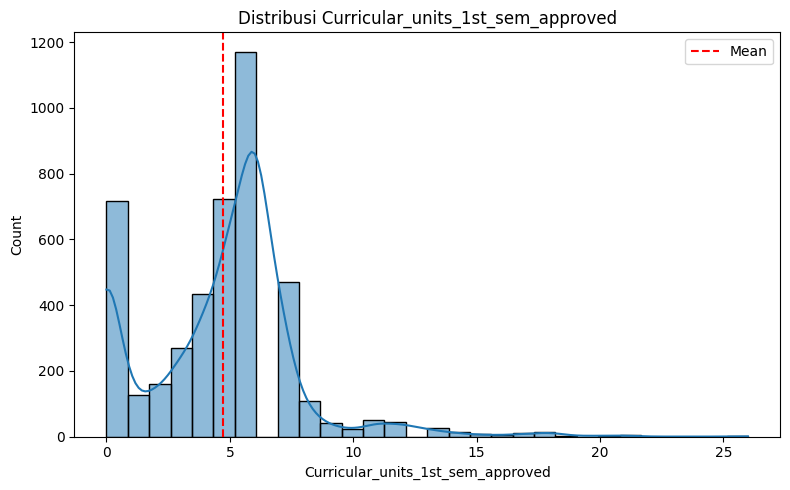

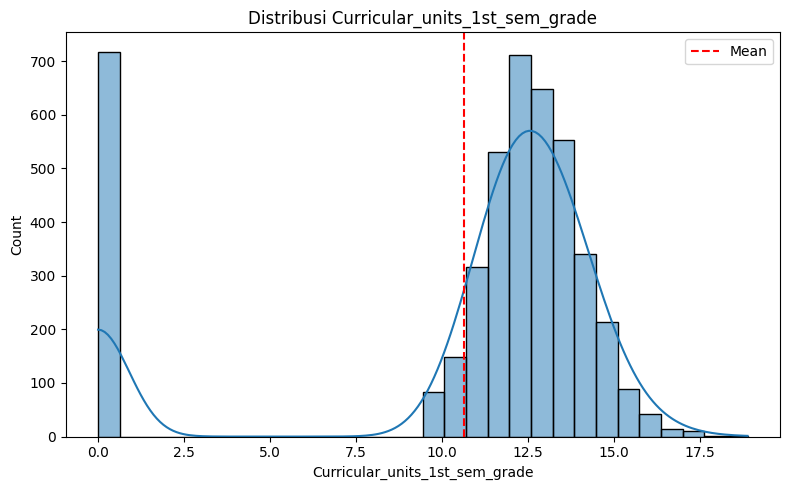

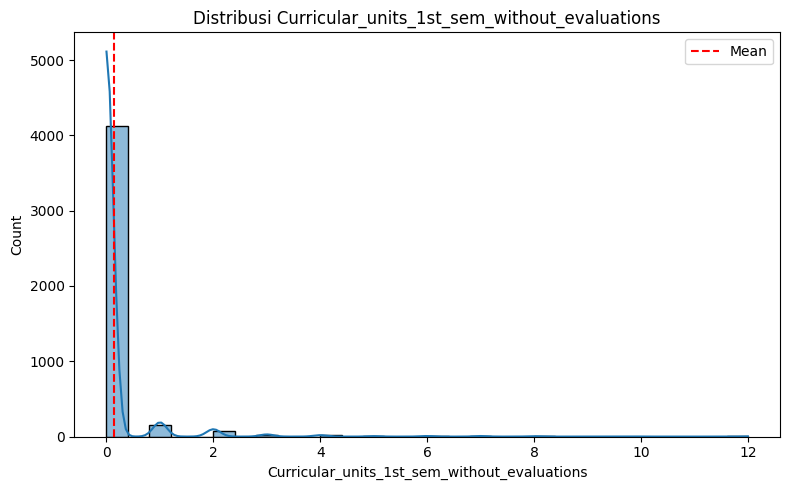

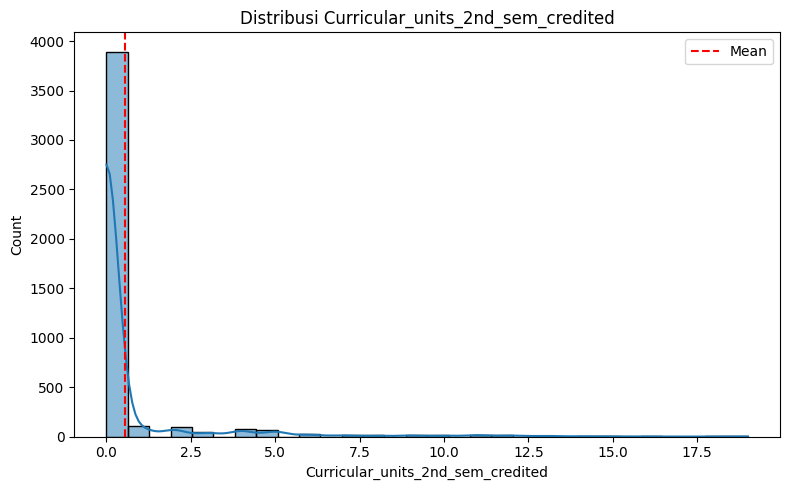

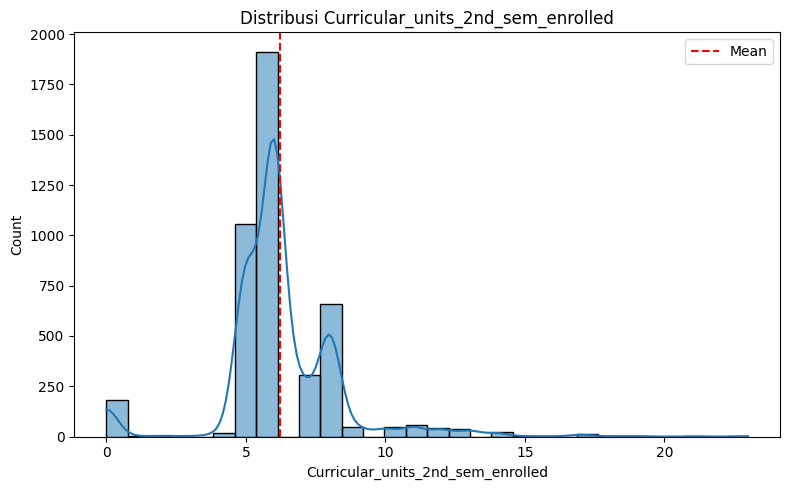

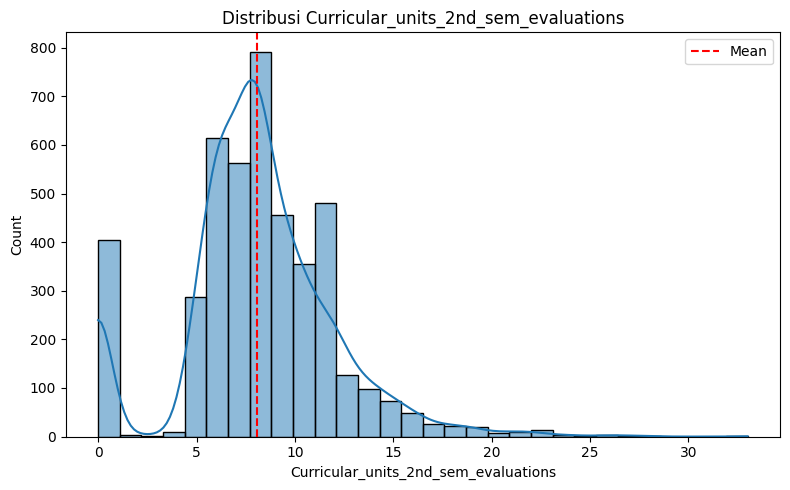

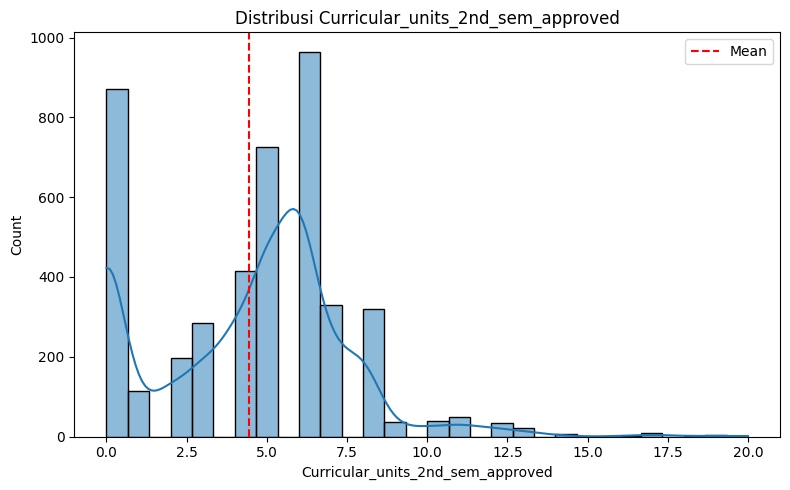

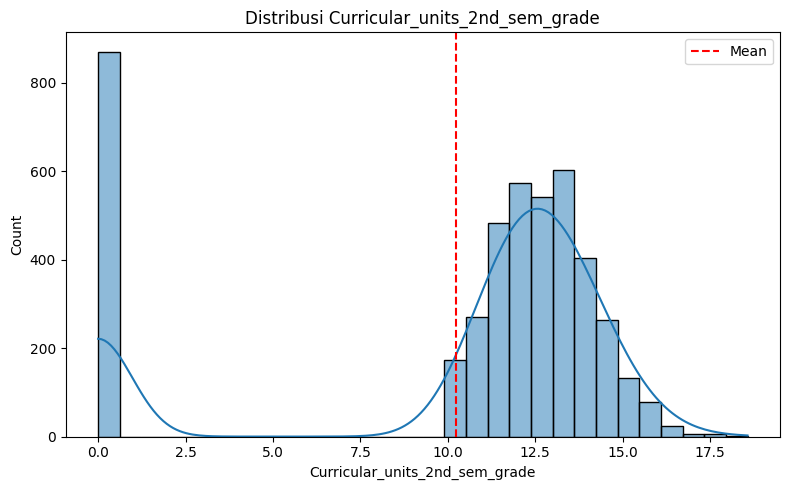

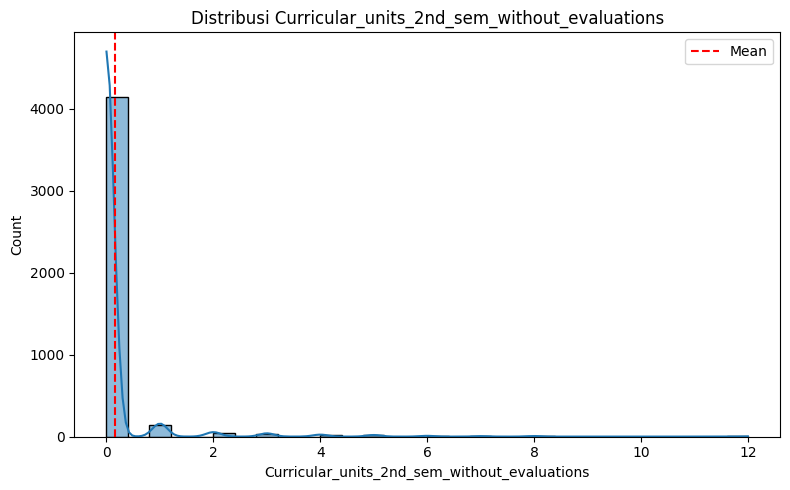

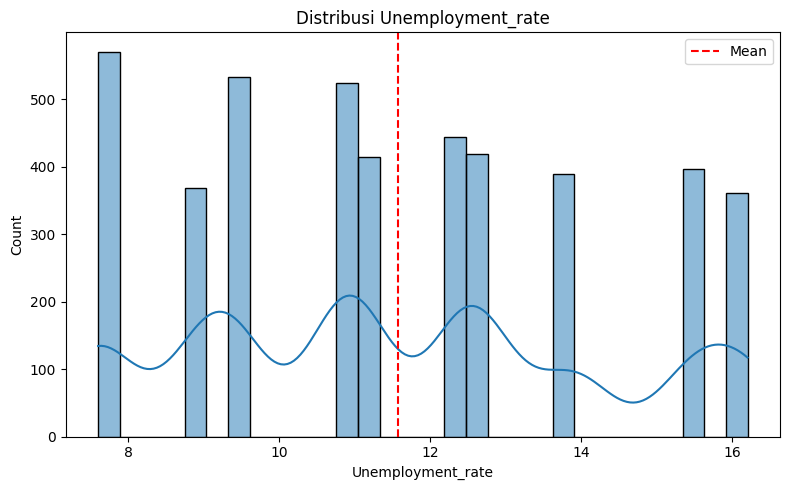

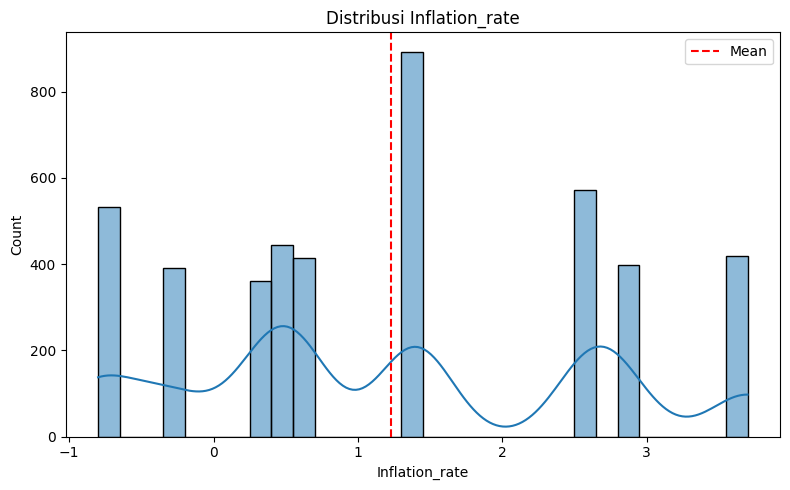

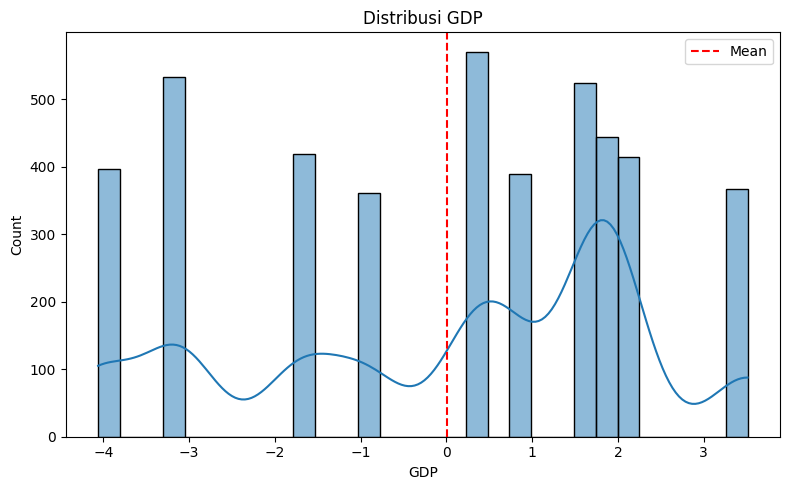

In [9]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribusi {col}')
    plt.axvline(df[col].mean(), color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.tight_layout()

In [10]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
cat_cols = [c for c in cat_cols if c != 'Status']

In [11]:
for col in cat_cols:
    plt.figure()
    sns.countplot(x=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Frekuensi {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

In [12]:
df['Dropout'] = (df['Status'] == 'Dropout').astype(int)
y = df['Dropout']
print("Proporsi Dropout:", y.mean().round(3))

Proporsi Dropout: 0.321


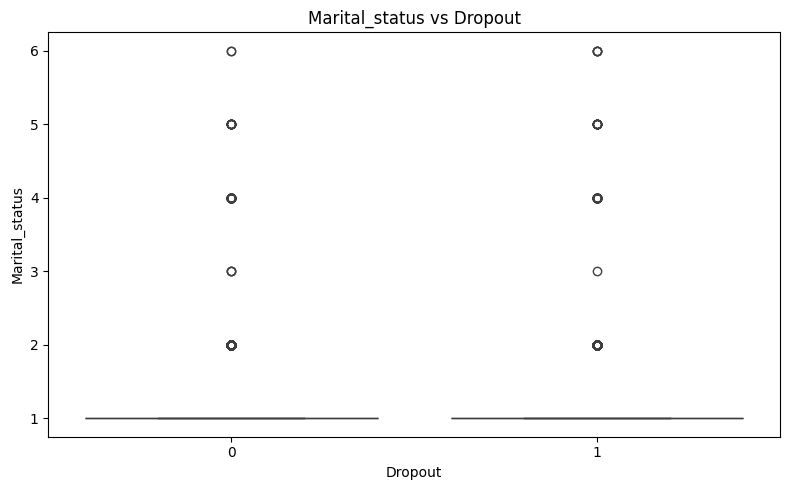

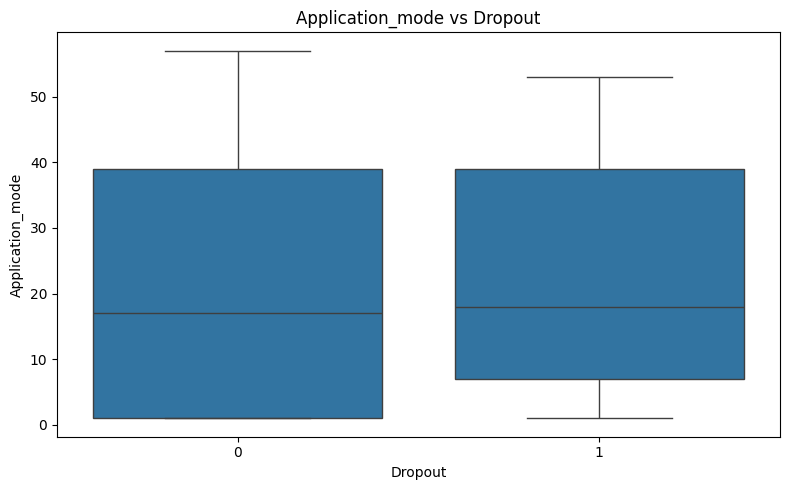

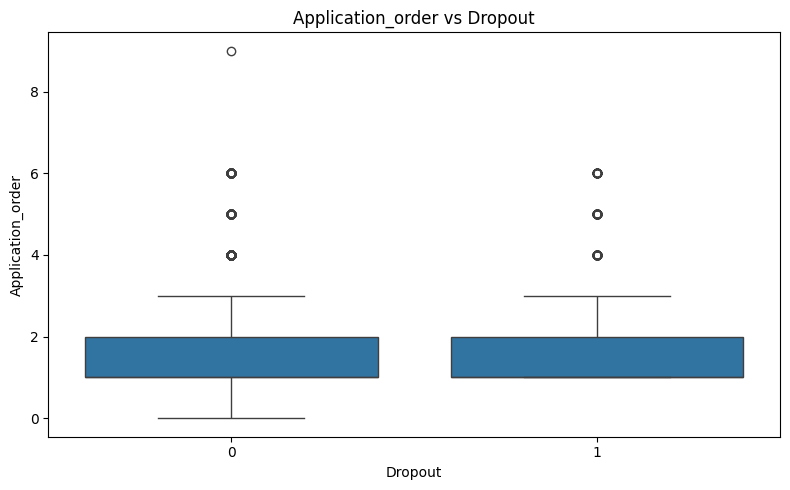

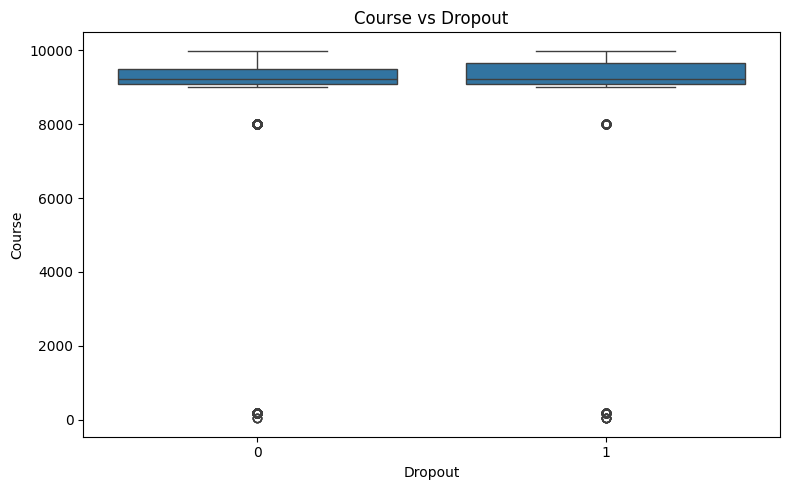

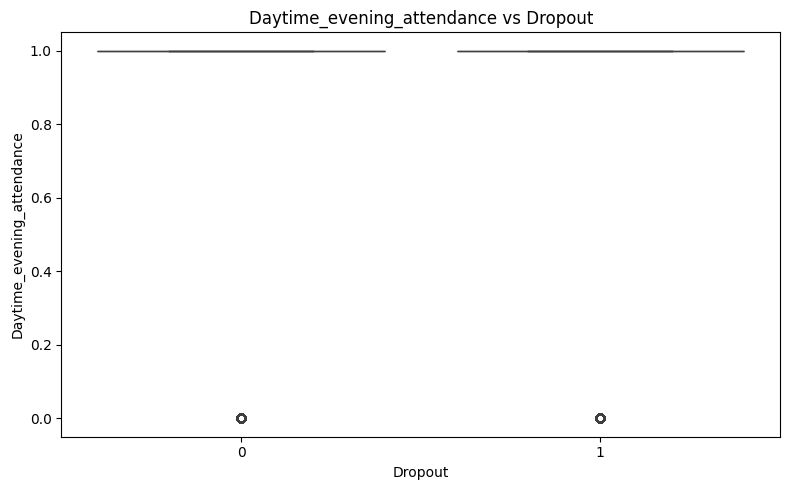

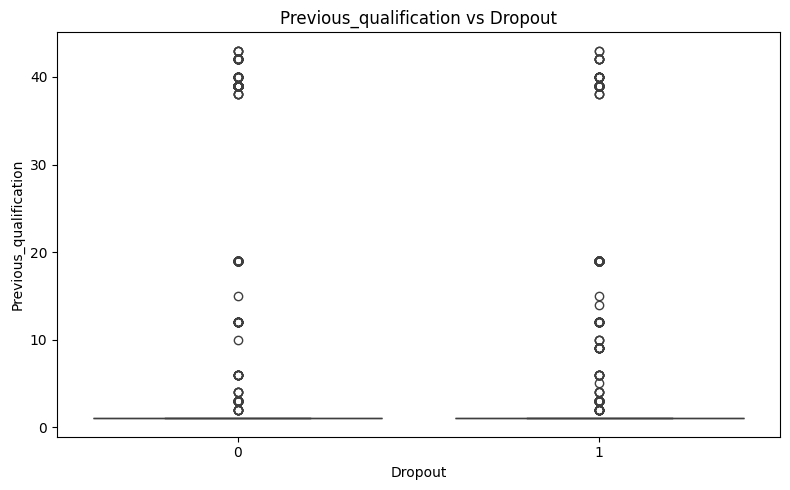

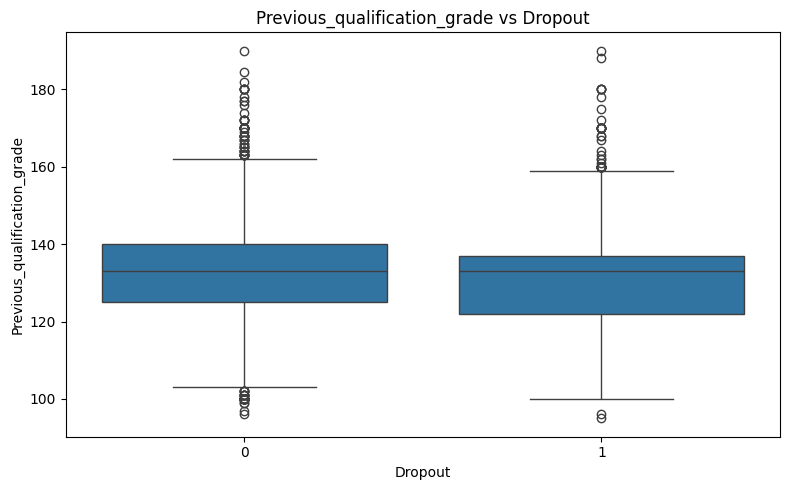

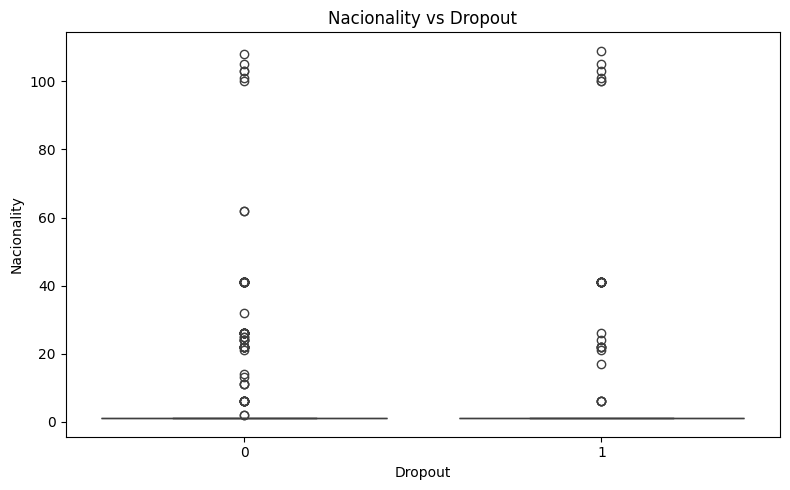

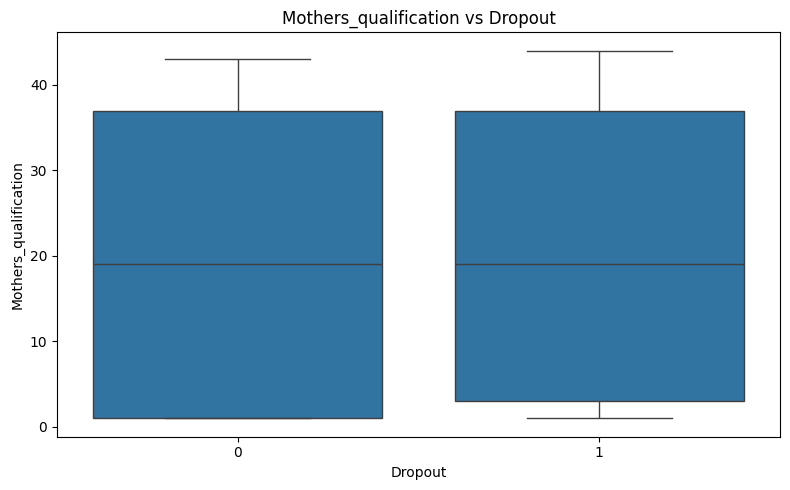

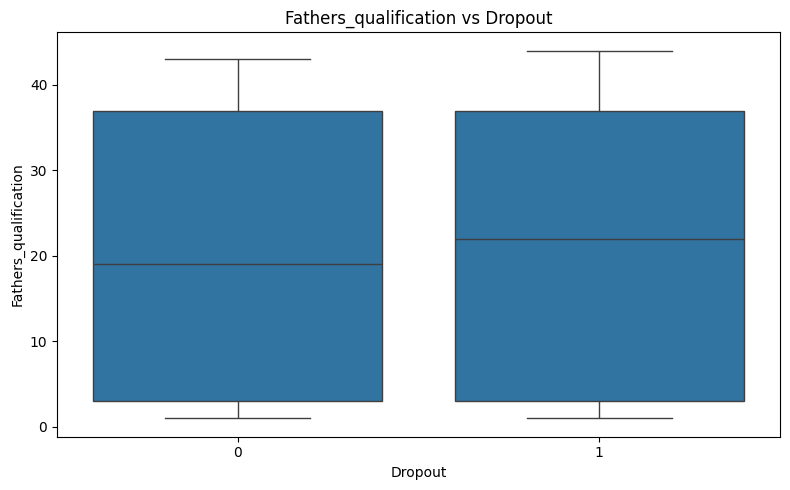

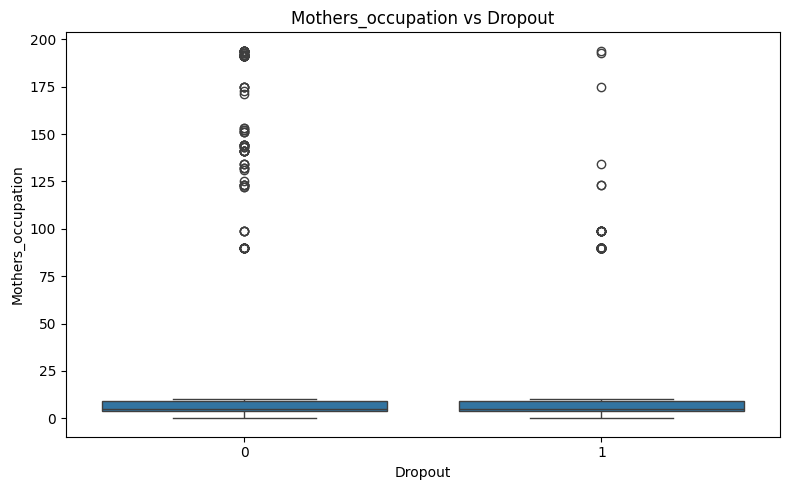

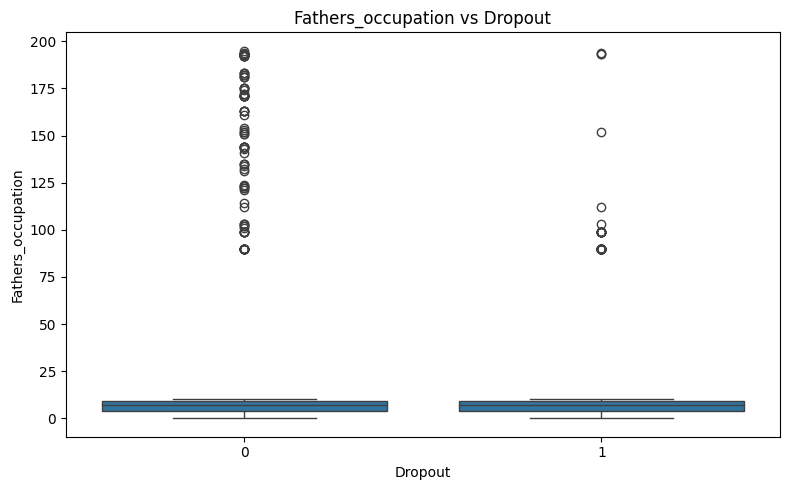

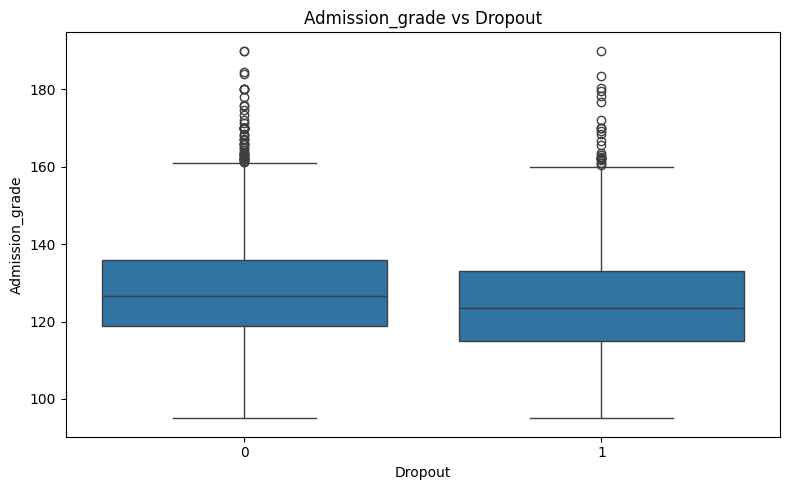

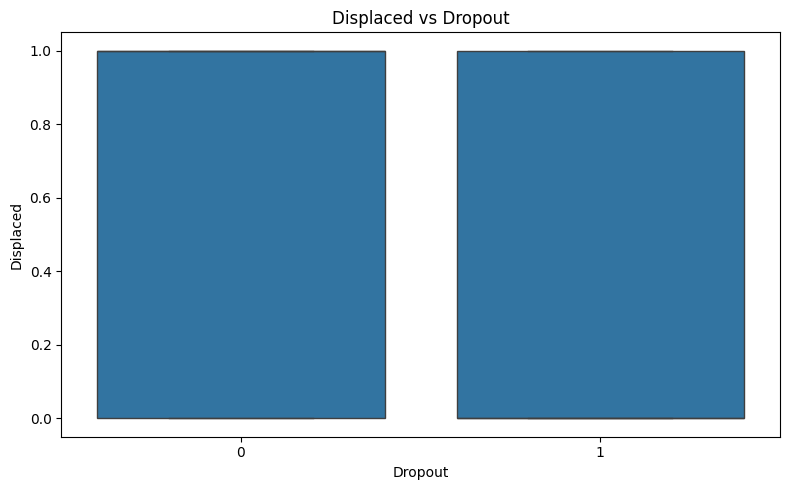

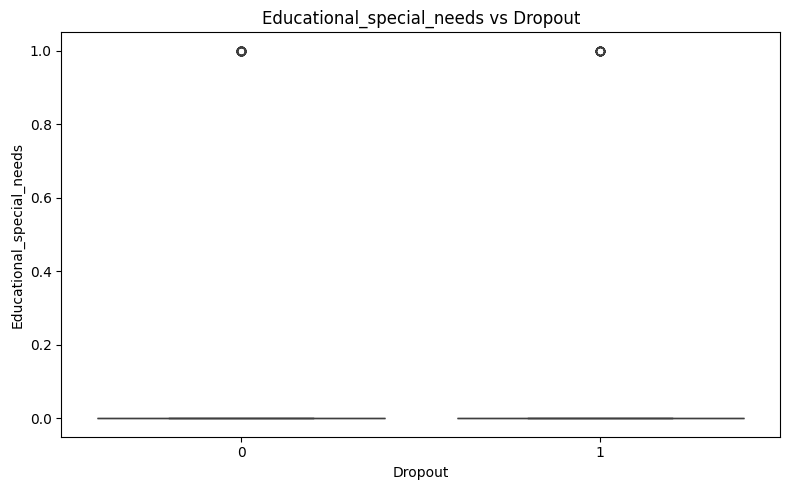

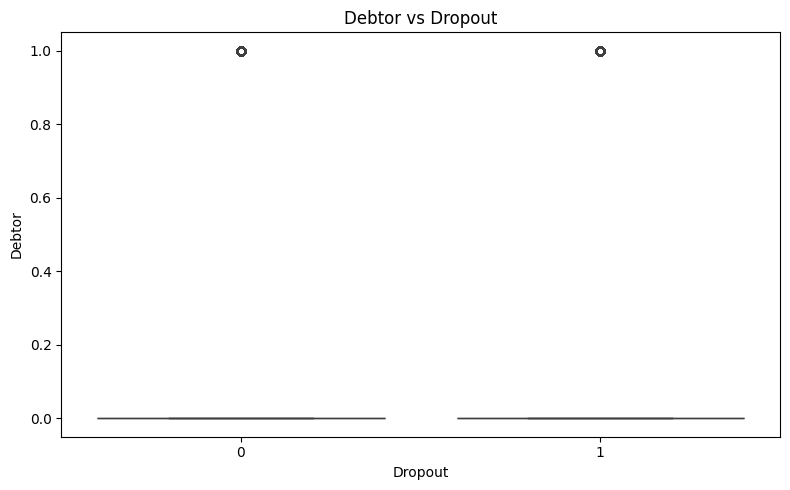

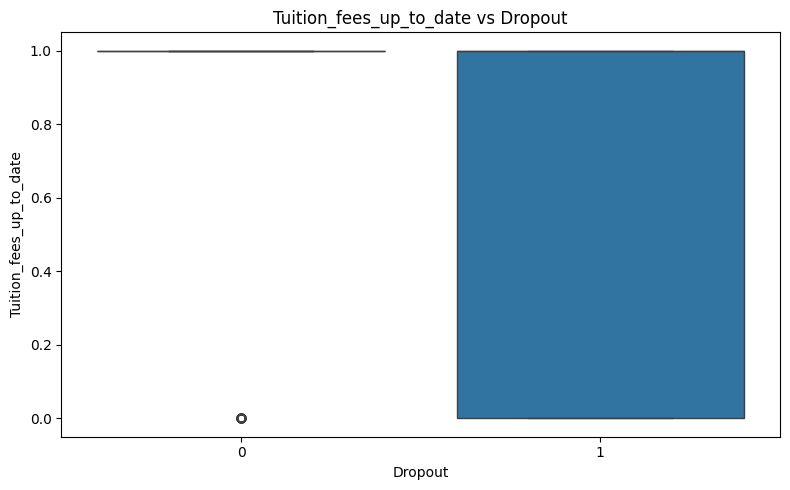

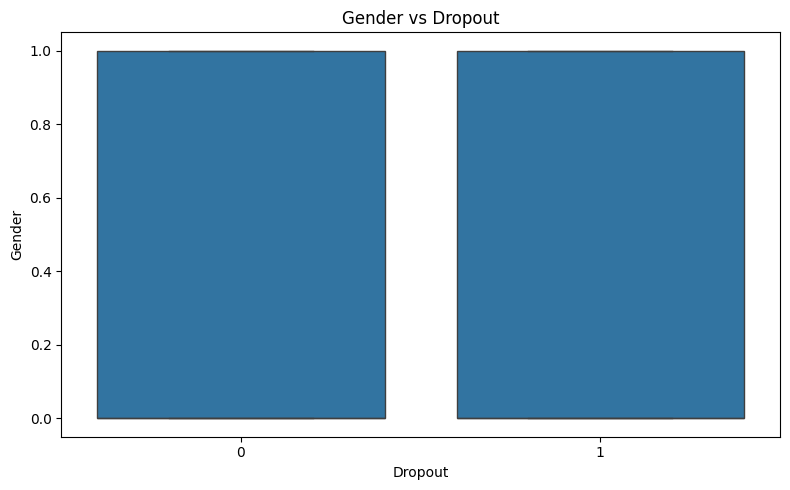

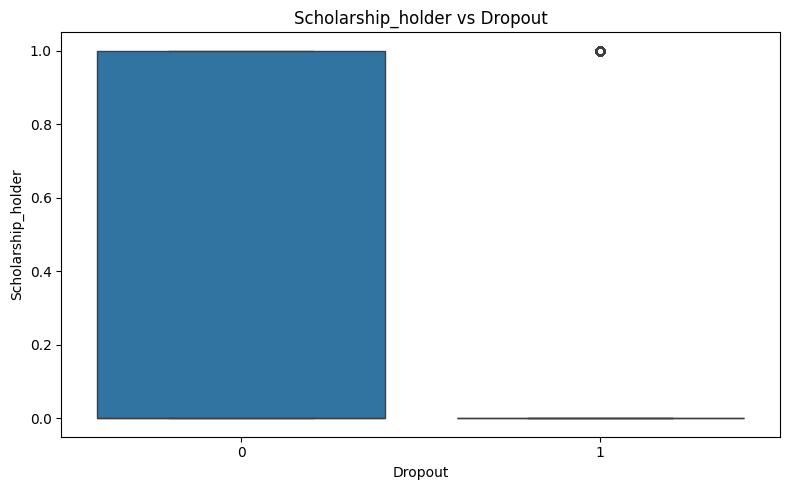

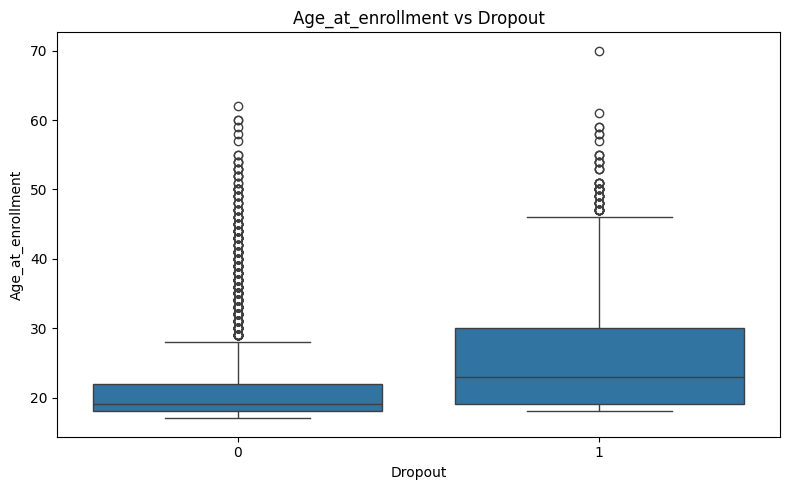

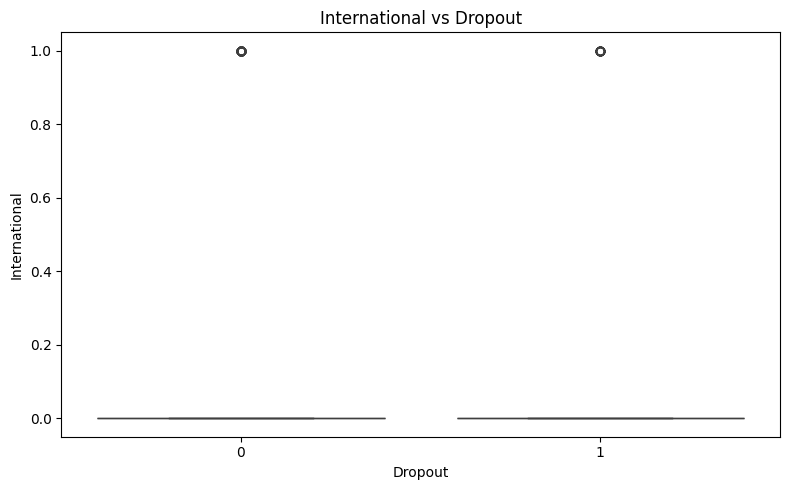

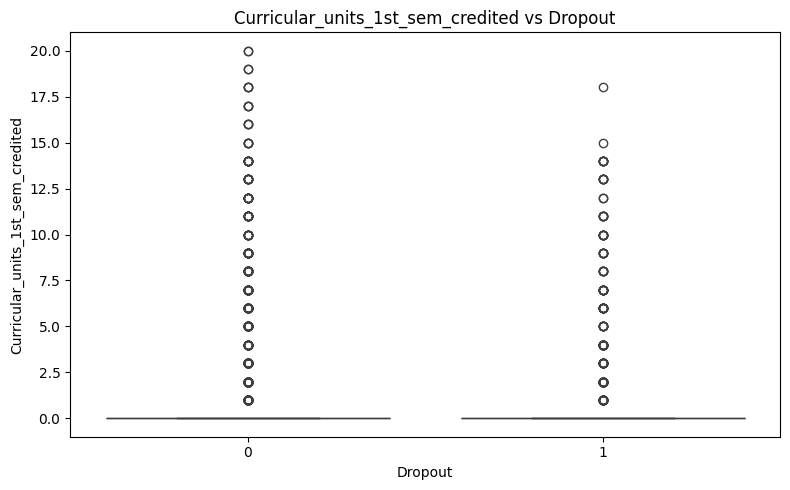

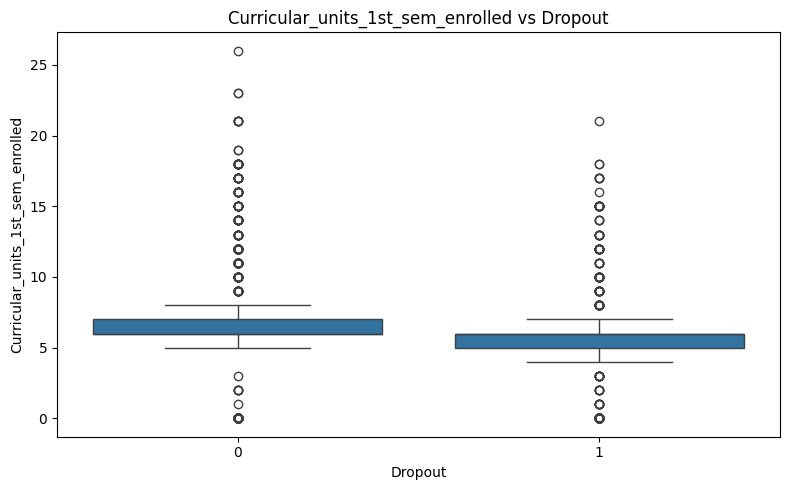

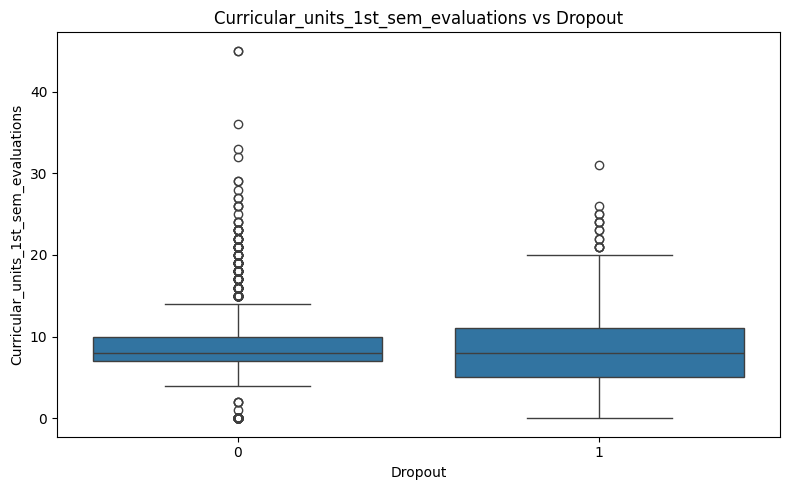

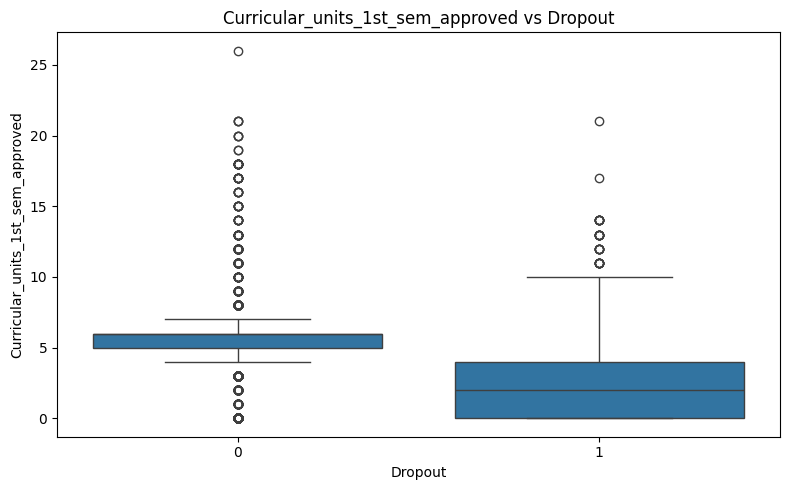

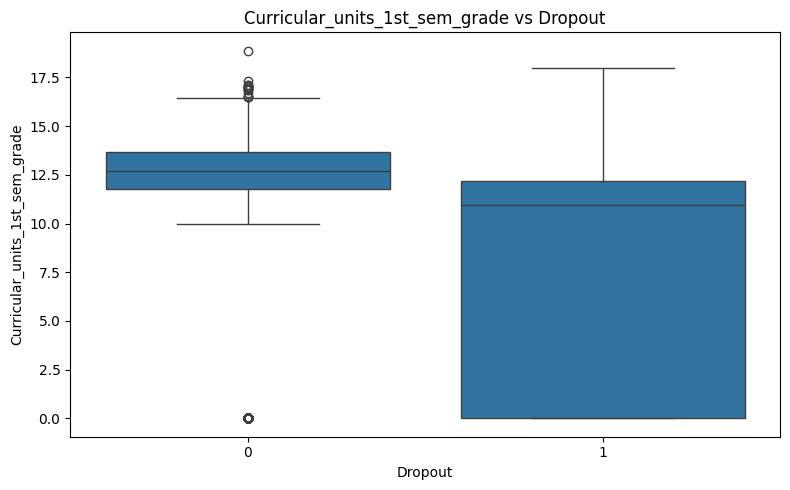

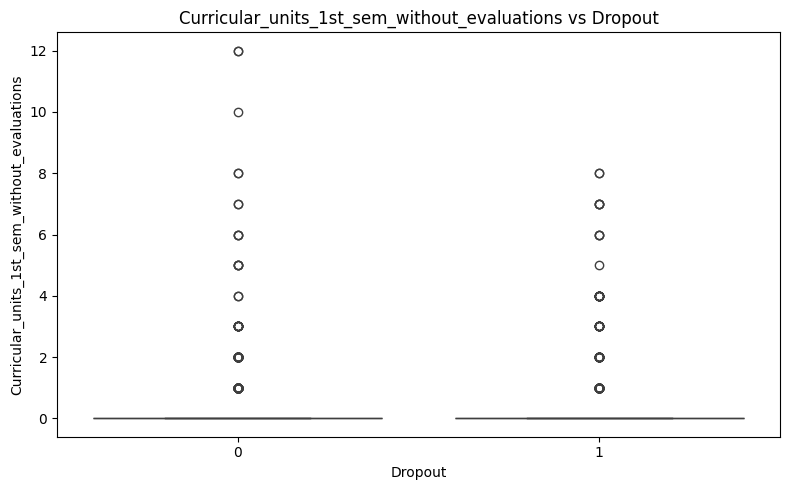

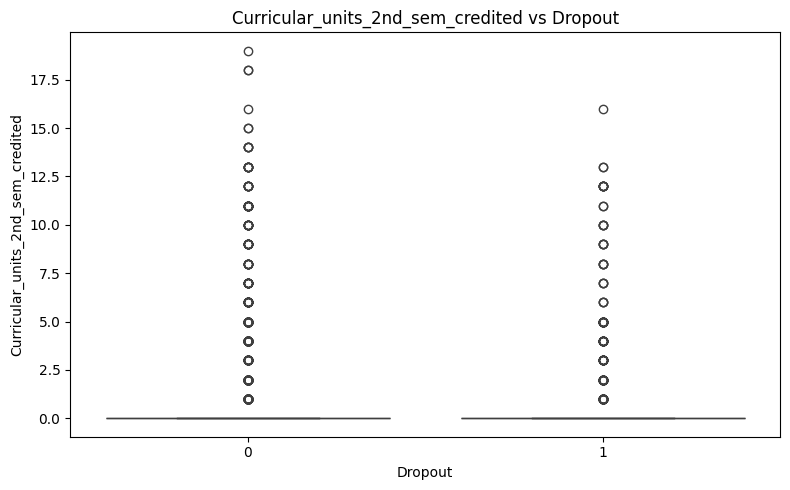

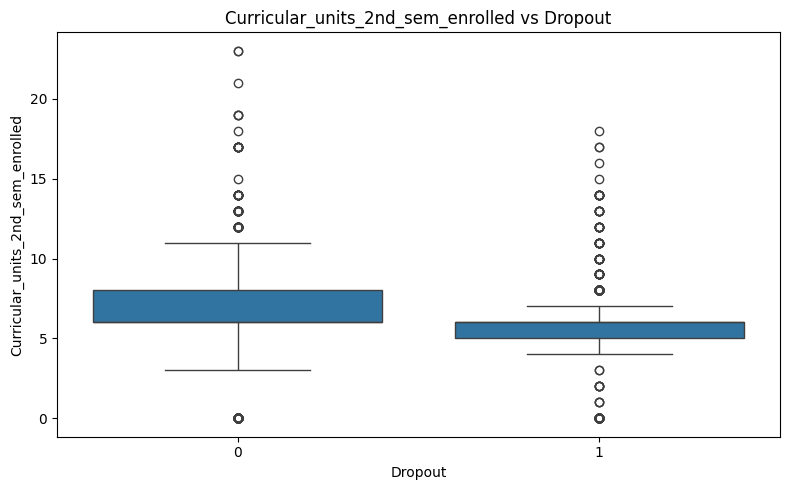

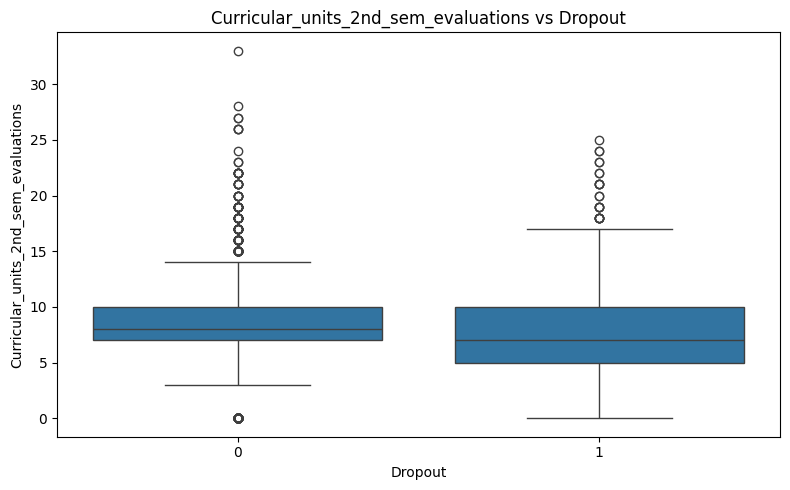

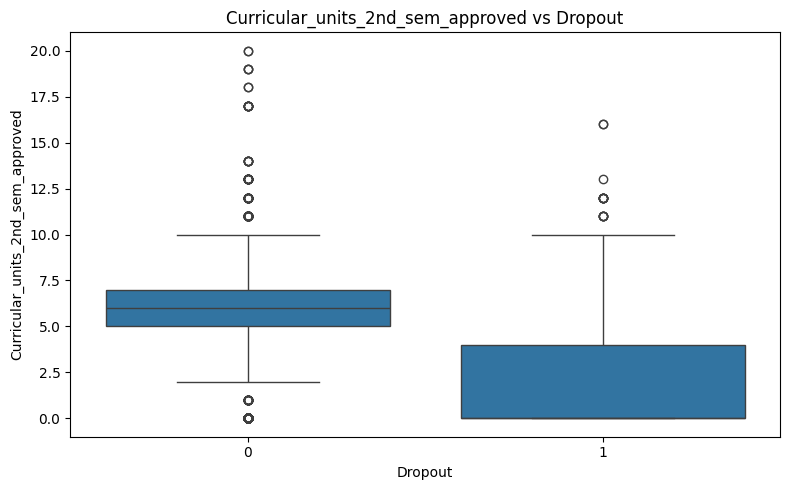

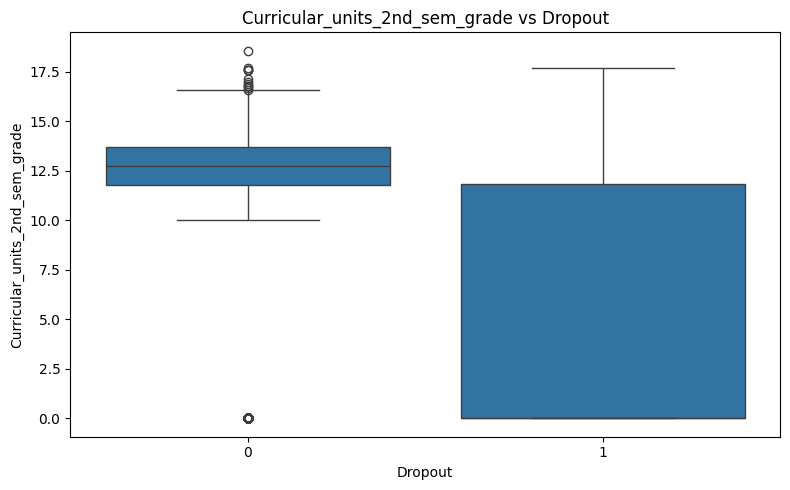

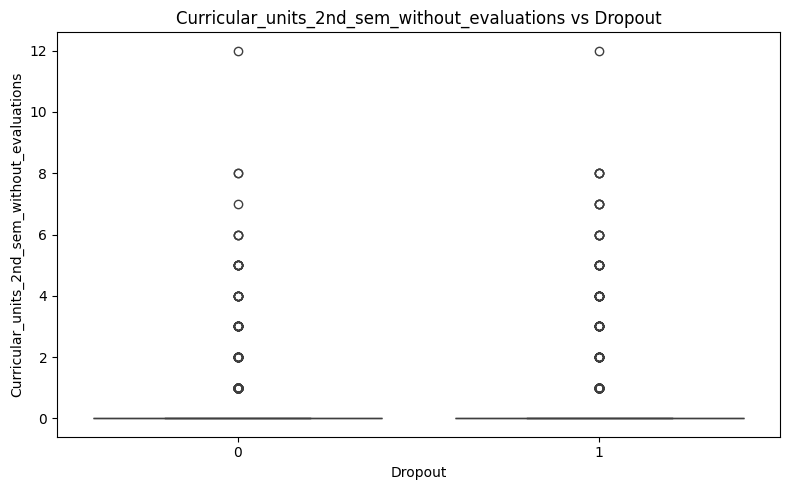

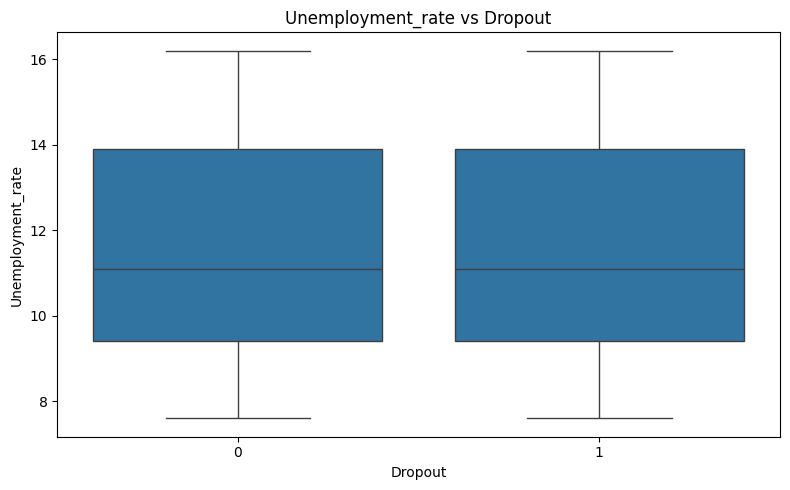

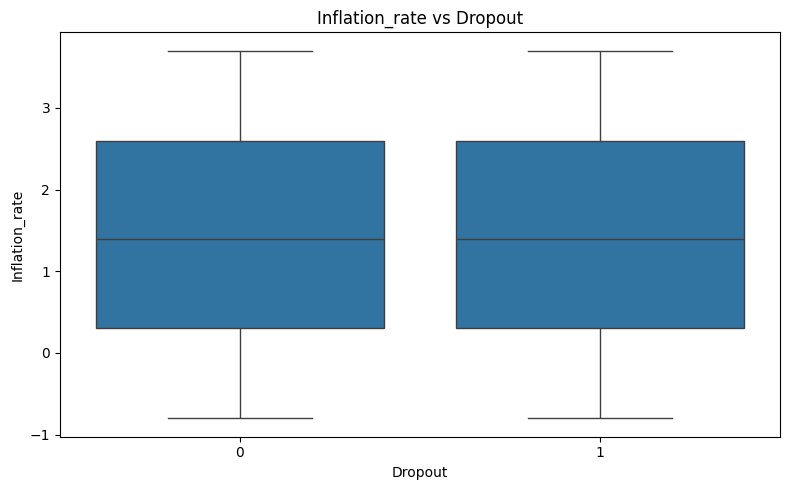

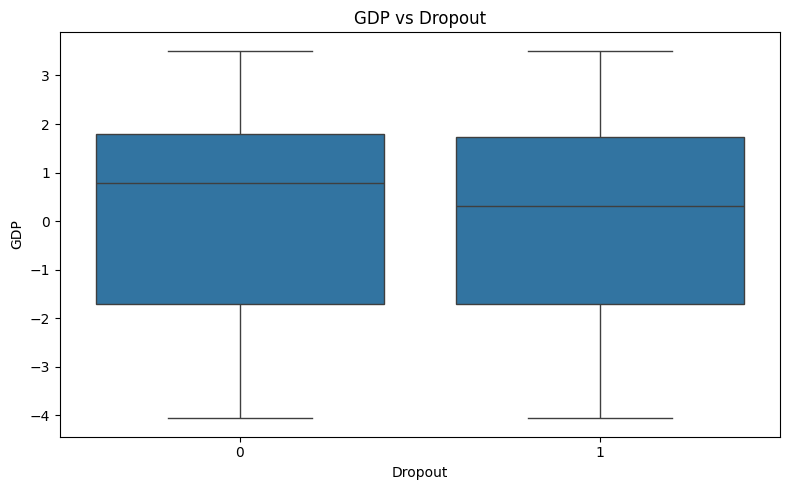

In [13]:
for col in num_cols:
    plt.figure()
    sns.boxplot(x='Dropout', y=col, data=df)
    plt.title(f'{col} vs Dropout')
    plt.tight_layout()

In [14]:
def stacked_bar(col):
    ctab = pd.crosstab(df[col], df['Dropout'], normalize='index')*100
    ctab.plot(kind='bar', stacked=True)
    plt.title(f'Dropout (%) by {col}')
    plt.ylabel('Percentage')
    plt.legend(title='Dropout', labels=['No','Yes'])
    plt.tight_layout()

In [15]:
for col in cat_cols:
    stacked_bar(col)

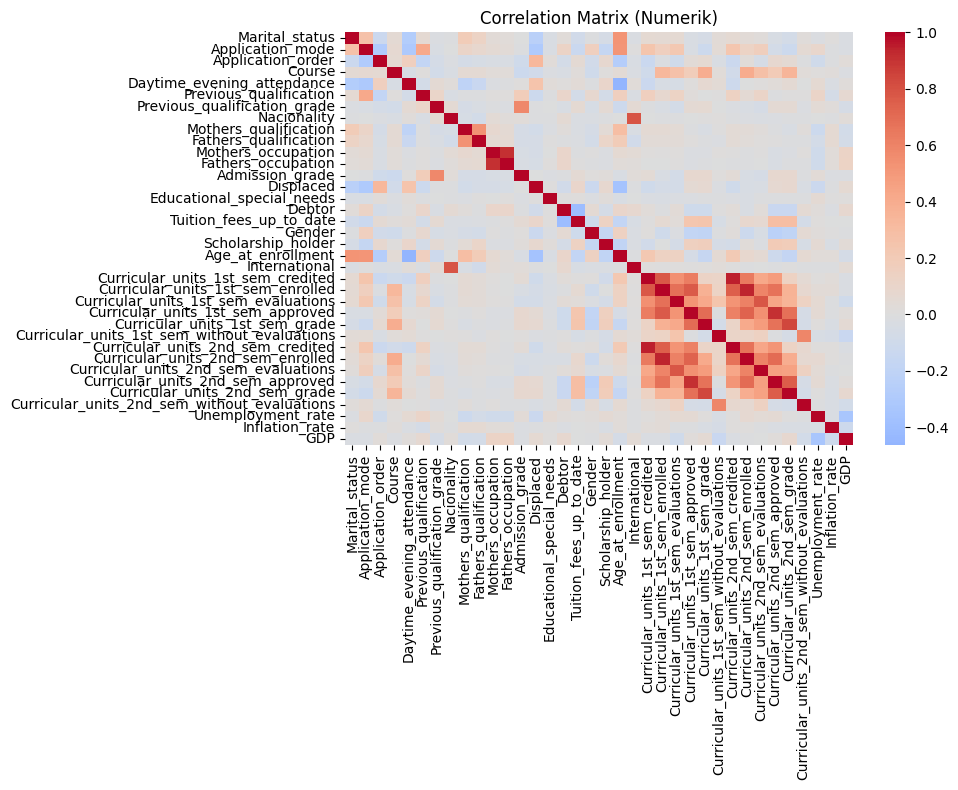

In [16]:
corr = df[num_cols].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numerik)')
plt.tight_layout()

In [17]:
corr_target = {col: pointbiserialr(df[col], y)[0] for col in num_cols}
corr_target = pd.Series(corr_target).sort_values(key=abs, ascending=False)
print("Korelasi numerik → Dropout (Top 15):")
display(corr_target.head(15).to_frame('r_pb'))

Korelasi numerik → Dropout (Top 15):


,r_pb
Curricular_units_2nd_sem_grade,-0.571792
Curricular_units_2nd_sem_approved,-0.569500
Curricular_units_1st_sem_grade,-0.480669
Curricular_units_1st_sem_approved,-0.479112
Tuition_fees_up_to_date,-0.429149
Age_at_enrollment,0.254215
Scholarship_holder,-0.245354
Debtor,0.229407
Gender,0.203983
Application_mode,0.198458


## Data Preparation / Preprocessing

In [18]:
X = df.drop(columns=['Status', 'Dropout'])
cat_cols = X.select_dtypes(include='object').columns.tolist()
num_cols = X.select_dtypes(include=np.number).columns.tolist()

In [19]:
preprocess = ColumnTransformer(
    [('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
     ('num', StandardScaler(), num_cols)]
)

## Modeling

In [20]:
xgb = XGBClassifier(
    n_estimators=450,
    learning_rate=0.03,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    eval_metric='logloss',
    random_state=42
)

In [21]:
model = ImbPipeline(steps=[
    ('prep', preprocess),
    ('smote', SMOTE(random_state=42)),
    ('clf', xgb)
])

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

In [23]:
model.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  []),
                                                 ('num', StandardScaler(),
                                                  ['Marital_status',
                                                   'Application_mode',
                                                   'Application_order',
                                                   'Course',
                                                   'Daytime_evening_attendance',
                                                   'Previous_qualification',
                                                   'Previous_qualification_grade',
                                                   'Nacionality',
                                                   'Mothers_qualification',
                                                   'Fathers_qualification',
                                                   'Mother...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.03,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=6, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=450, n_jobs=None,
                               num_parallel_tree=None, ...))])

## Evaluation

In [24]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Akurasi Test: {acc:.3%}")

Akurasi Test: 88.630%


In [25]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Non‑Dropout','Dropout']))


Classification Report:
              precision    recall  f1-score   support

 Non‑Dropout       0.90      0.93      0.92       901
     Dropout       0.85      0.79      0.82       427

    accuracy                           0.89      1328
   macro avg       0.87      0.86      0.87      1328
weighted avg       0.89      0.89      0.89      1328



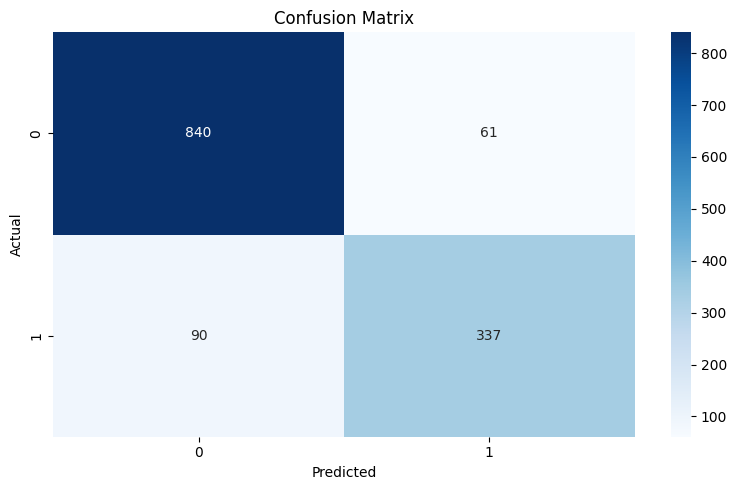

In [26]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix"); plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout()

In [27]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
print("\nCV Akurasi:", cv_scores.round(4))
print("Rata‑rata:", cv_scores.mean().round(4))


CV Akurasi: [0.8701 0.8621 0.8904 0.8881 0.8925]
Rata‑rata: 0.8807


# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

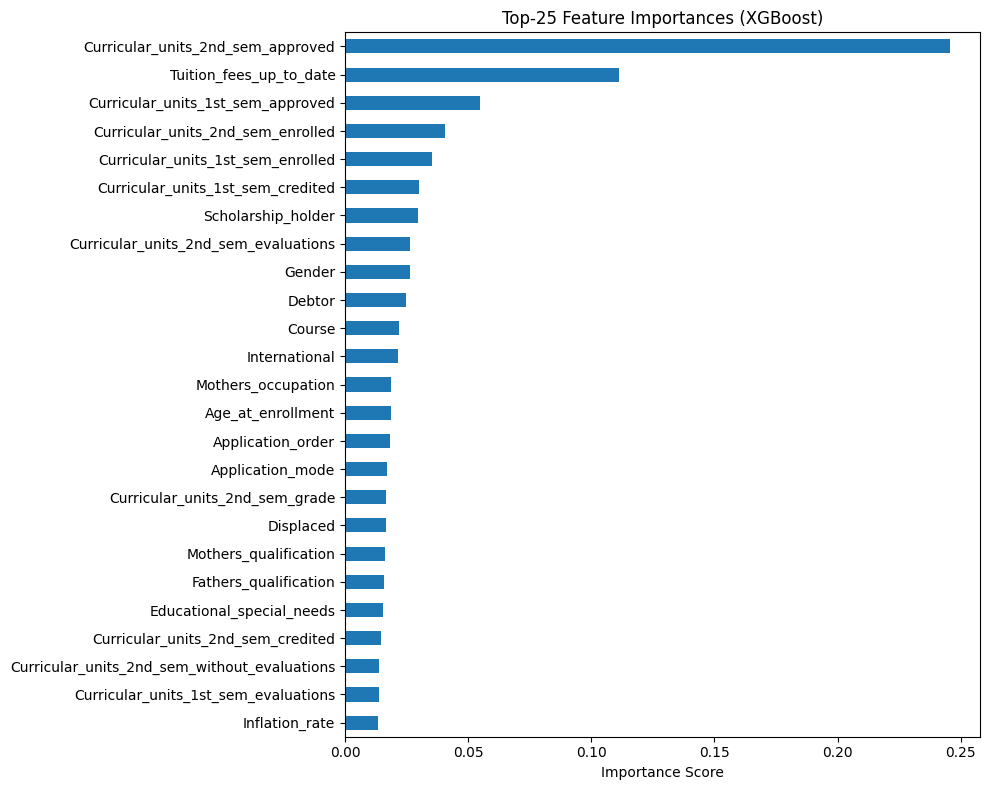

In [28]:
all_features = num_cols.copy() 
feature_importances = model.named_steps['clf'].feature_importances_
imp_series = pd.Series(feature_importances, index=all_features).sort_values(ascending=False)[:25]
plt.figure(figsize=(10, 8))
imp_series.sort_values().plot.barh()
plt.title("Top-25 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.tight_layout()

In [29]:
with open("model_dropout.pkl", "wb") as f:
    pickle.dump(model, f)
print("\nModel tersimpan sebagai model_dropout.pkl")


Model tersimpan sebagai model_dropout.pkl


In [30]:
with open("feature_names.json", "w") as f:
    json.dump(all_features, f)

In [ ]:
test_row = X.sample(1, random_state=1)
proba = model.predict_proba(test_row)[0][1]
prediction = model.predict(test_row)[0]
predicted_status = "Dropout" if prediction == 1 else "Graduate"

print("\nPrediction for sample student:")
print(f"Probability of Dropout: {proba:.1%}")
print(f"Predicted Status: {predicted_status}")


Prediction for sample student:
Probability of Dropout: 99.5%
Predicted Status: Dropout

Key features of this student:
Age at enrollment: 29
First semester approved units: 0
Second semester approved units: 0
Tuition fees up to date: Yes
First semester grade: 0.0
Second semester grade: 0.0
